In [12]:
%pip install matplotlib

import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt


amazn_df = pd.read_csv('AMZN_Stock_Data.csv')




[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
amazn_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,312.579987,314.750000,306.959991,308.519989,308.519989,2783200
1,2015-01-05,307.010010,308.380005,300.850006,302.190002,302.190002,2774200
2,2015-01-06,302.239990,303.000000,292.380005,295.290009,295.290009,3519000
3,2015-01-07,297.500000,301.279999,295.329987,298.420013,298.420013,2640300
4,2015-01-08,300.320007,303.140015,296.109985,300.459991,300.459991,3088400


In [14]:
amazn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1497 non-null   object 
 1   Open       1497 non-null   float64
 2   High       1497 non-null   float64
 3   Low        1497 non-null   float64
 4   Close      1497 non-null   float64
 5   Adj Close  1497 non-null   float64
 6   Volume     1497 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 82.0+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1497 non-null   datetime64[ns]
 1   Open       1497 non-null   float64       
 2   High       1497 non-null   float64       
 3   Low        1497 non-null   float64       
 4   Close      1497 non-null   float64       
 5   Adj Close  1497 non-null   float64       
 6   Volume     1497 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 82.0 KB


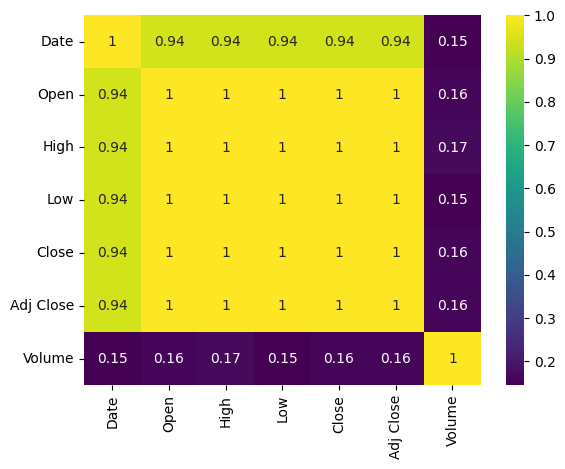

In [15]:
amazn_df['Date'] = pd.to_datetime(amazn_df['Date'])

amazn_df.info()
sbn.heatmap(amazn_df.corr(),annot=True, cmap='viridis')
plt.show()